# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:

import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
from pprint import pprint
from api_keys import weather_api_key
import citipy as citipy
import numpy as np
import time
import scipy.stats as st
from scipy.stats import linregress

from citipy import citipy
import datetime
import seaborn as sns

api_key = weather_api_key


lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [11]:
# List to hold cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add to cities list
    if city not in cities:
        cities.append(city)

# Print the city count 
len(cities)

643

In [12]:
# create the dataframe to hold city info

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:



base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For city name in cities 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 100:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")


            





Processing Record 1 of Set 1 : bathsheba
Processing Record 2 of Set 1 : farah
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : tasiilaq
City not found. Skipping...
Processing Record 5 of Set 1 : usogorsk
Processing Record 6 of Set 1 : saskylakh
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : longyearbyen
Processing Record 9 of Set 1 : krasnoselkup
Processing Record 10 of Set 1 : mataura
Processing Record 11 of Set 1 : mount gambier
Processing Record 12 of Set 1 : tocache
Processing Record 13 of Set 1 : marzuq
Processing Record 14 of Set 1 : lorengau
Processing Record 15 of Set 1 : havre-saint-pierre
Processing Record 16 of Set 1 : castro
Processing Record 17 of Set 1 : provideniya
Processing Record 18 of Set 1 : vila velha
Processing Record 19 of Set 1 : bereda
Processing Record 20 of Set 1 : sumbe
Processing Record 21 of Set 1 : murray bridge
Processing Record 22 of Set 1 : lavrentiya
Processing Record 23 of Set 1 : punta arenas
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:

weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})






In [15]:
#Display the DataFrame
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bathsheba,40,BB,1601410473,79,13.22,-59.52,84.20,17.22
1,Farah,0,AF,1601410473,55,32.50,62.50,45.79,3.65
2,Rikitea,54,PF,1601410474,78,-23.12,-134.97,70.43,21.81
3,Tasiilaq,75,GL,1601410474,80,65.61,-37.64,33.80,12.75
4,Usogorsk,67,RU,1601410474,88,63.41,48.69,47.05,4.94
...,...,...,...,...,...,...,...,...,...
578,Saint Anthony,75,US,1601410699,48,45.02,-93.22,64.40,11.41
579,Kirakira,1,SB,1601410699,81,-10.45,161.92,78.57,7.45
580,Lingao,100,CN,1601410700,83,19.91,109.69,79.68,1.70
581,Assiut,0,EG,1601410700,42,27.18,31.18,86.00,11.41


In [17]:
# Export the dataframe into a csv



weather_df.to_csv("cities.csv")



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
 #  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] > 100]



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

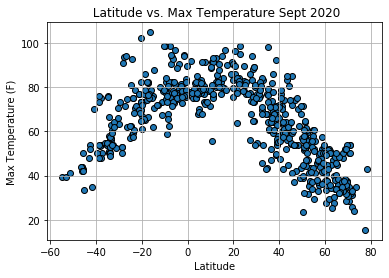

In [20]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
ax.set_title(' Latitude vs. Max Temperature Sept 2020')
ax.scatter(weather_df['Lat'],weather_df['Max Temp'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_max_temp.png')

## Latitude vs. Humidity Plot

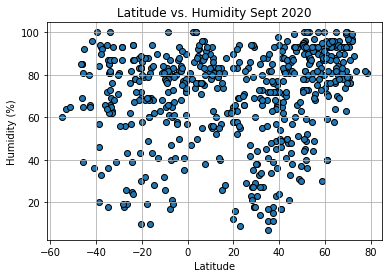

In [21]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
ax.set_title('Latitude vs. Humidity Sept 2020')
ax.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_humidity.png')

## Latitude vs. Cloudiness Plot

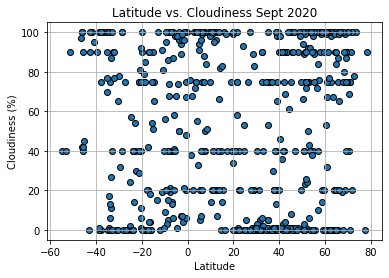

In [22]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
ax.set_title('Latitude vs. Cloudiness Sept 2020')
ax.scatter(weather_df['Lat'],weather_df['Cloudiness'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_cloudiness.png')

## Latitude vs. Wind Speed Plot

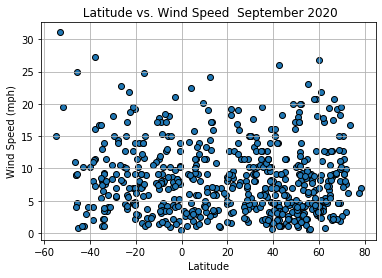

In [23]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
ax.set_title(' Latitude vs. Wind Speed  September 2020')
ax.scatter(weather_df['Lat'],weather_df['Wind Speed'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_wind_speed.png')

## Linear Regression

In [24]:
# Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [25]:
# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.83


Text(0, 0.5, 'Max Temp (F)')

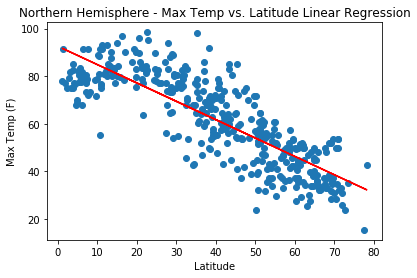

In [26]:
# 1st Call
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# 2nd Call
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.75


Text(0, 0.5, 'Humidity (%)')

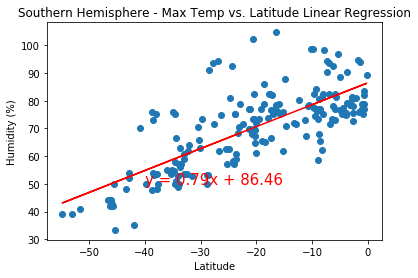

In [27]:

equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])


annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.22


Text(0, 0.5, 'Humidity (%)')

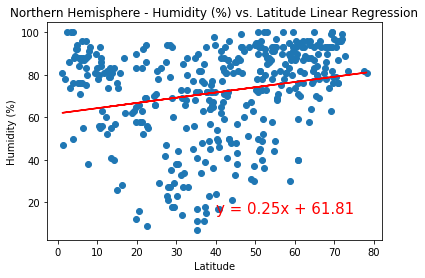

In [28]:

equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])


annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.03


Text(0, 0.5, 'Humidity (%)')

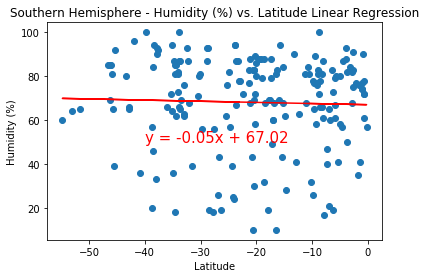

In [29]:

equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])


annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.1


Text(0, 0.5, 'Cloudiness (%)')

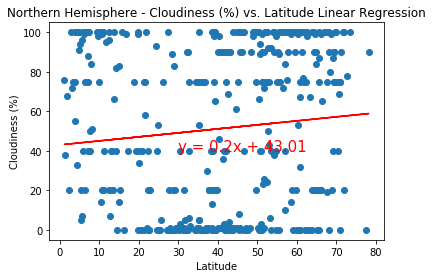

In [30]:

equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])


annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.02


Text(0, 0.5, 'Cloudiness (%)')

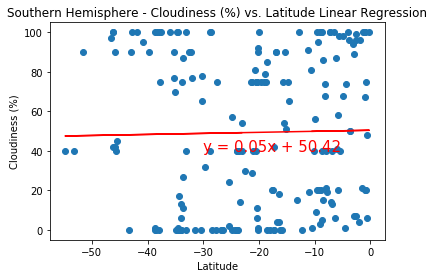

In [31]:

equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])


annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.02


Text(0, 0.5, 'Wind Speed (mph)')

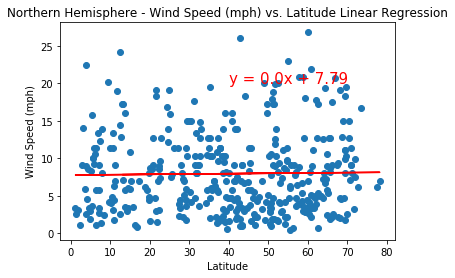

In [32]:

equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])


annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.11


Text(0, 0.5, 'Wind Speed (mph)')

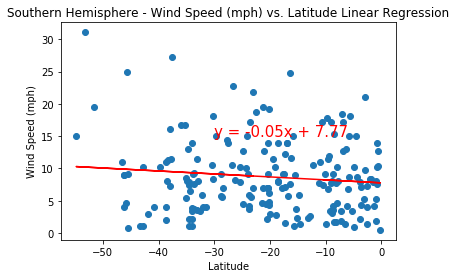

In [33]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])


annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")
